In [3]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import mplcyberpunk
import requests

from bs4 import BeautifulSoup
from datetime import datetime

## Lista de bilionários de 2022 segundo a Forbes

In [4]:
urls = []

urls.append('https://forbes.com.br/bilionarios-2022/2022/12/lista-forbes-de-bilionarios-brasileiros/')

for index in range(2, 16):
    urls.append(f'https://forbes.com.br/forbes-money/2022/12/lista-forbes-de-bilionarios-brasileiros-{index}/')

In [5]:
BROWSERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/357.36 \(KHTML, like Gecko) Chrome / 86.0.4240Safari / 537.36'}
names = []
patrimonies = []

for url in urls:
    response = requests.get(url, headers=BROWSERS)
    content = response.text
    soup_content = BeautifulSoup(content, 'html.parser')
    cards = soup_content.find_all('li', attrs={'data-aos': 'fade-up'})

    for card in cards:
        name = card.h3.text
        patrimony = card.p.strong.text.split(' ')[1].replace(',', '.')
        names.append(name.upper())
        patrimonies.append(patrimony)


In [6]:
df_billionaires = pd.DataFrame()
df_billionaires['Nome'] = names
df_billionaires['Patrimônio em R$'] = pd.to_numeric(patrimonies)
df_billionaires


,Nome,Patrimônio em R$
0,JORGE PAULO LEMANN,72.00
1,EDUARDO LUIZ SAVERIN,52.80
2,MARCEL HERRMANN TELLES,48.00
3,CARLOS ALBERTO DA VEIGA SICUPIRA E FAMÍLIA,39.85
4,"JACOB, DAVID, ESTHER E ALBERTO SAFRA",38.90
...,...,...
285,CLEUSA CAMPOS GARFINKEL,1.00
286,EDUARDO CINTRA SANTOS E FAMÍLIA,1.00
287,MARINO E CAMILA STEFANI COLPO,1.00
288,JOSÉ MÁRIO CAPRIOLI DOS SANTOS E FAMÍLIA,1.00


In [ ]:
df_billionaires.to_excel('teste.xlsx')

In [35]:
df_billionaires['Patrimônio em R$'].sum()

1461.75

Text(0, 0.5, 'Em bilhões de R$')

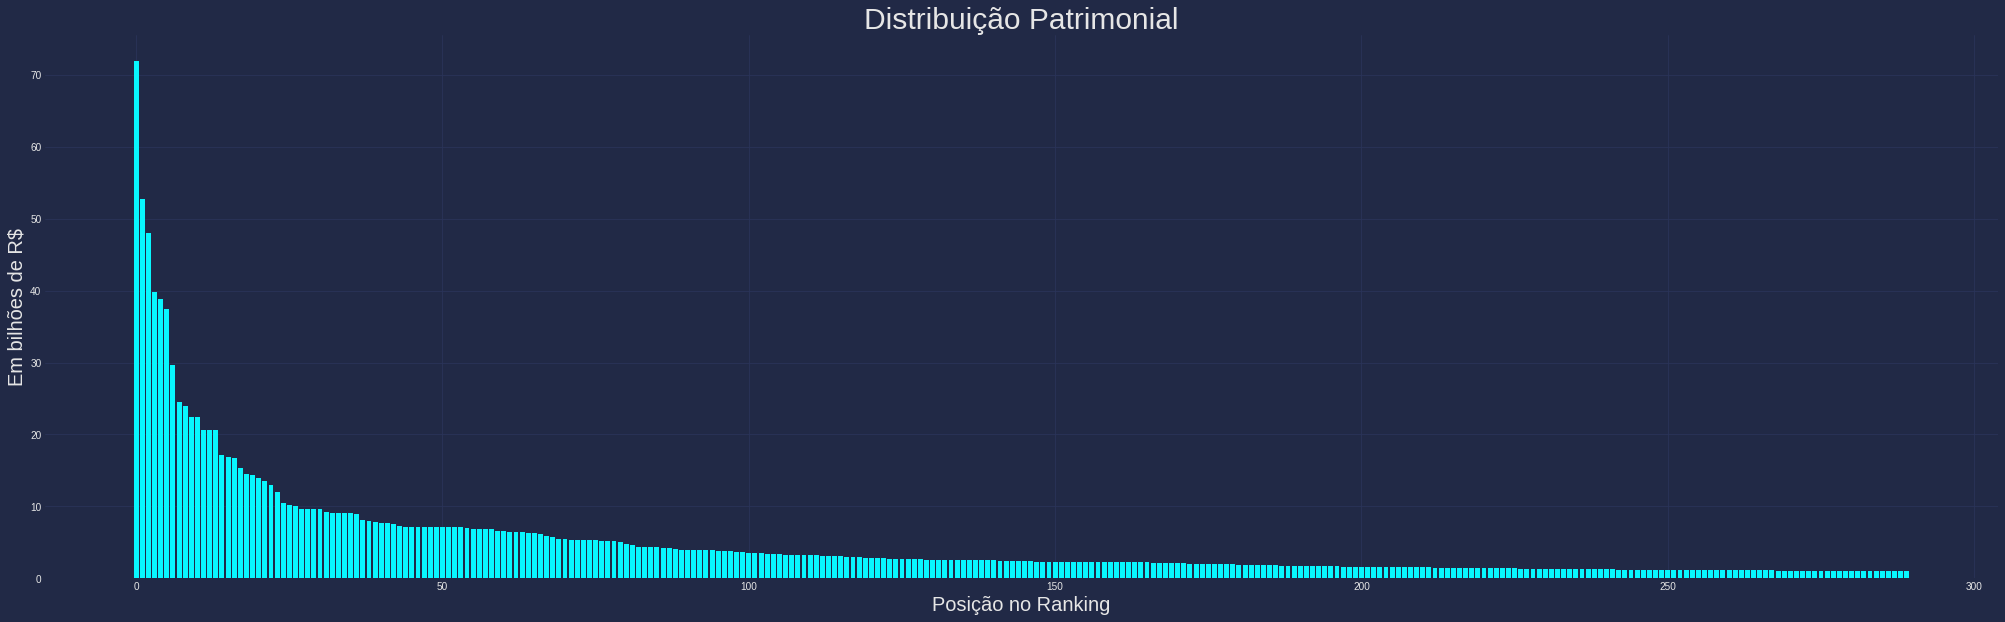

In [32]:
plt.rc('figure', figsize=(35, 10))
plt.style.use("cyberpunk")
plt.bar(df_billionaires.index, df_billionaires['Patrimônio em R$'])
plt.title('Distribuição Patrimonial', fontsize='30')
plt.xlabel('Posição no Ranking', fontsize='20')
plt.ylabel('Em bilhões de R$', fontsize='20')

## Orçamento Anual da União de 2022

In [10]:
OAU_URL_2022 = 'https://www.portaldatransparencia.gov.br/orcamento?ano=2022'
oau_response = requests.get(OAU_URL_2022, headers=BROWSERS)
oau_content = oau_response.text
oau_soup = BeautifulSoup(oau_content, 'html.parser')

In [11]:
oau_2022 = float(oau_soup.select('#totalDespesas')[0].text.split(' ')[1].replace('.', '').replace(',', '.')) / 1000000000
billionaries_patrimony = df_billionaires['Patrimônio em R$'].sum()

In [12]:
print(f'Orçamento Anual da União de 2022: R$ {round(oau_2022, 2)} bilhões.')
print(f'Patrimônio total dos bilionários em 2022: R$ {billionaries_patrimony} bilhões.')

Orçamento Anual da União de 2022: R$ 4828.21 bilhões.
Patrimônio total dos bilionários em 2022: R$ 1461.75 bilhões.


In [13]:
plt.rc('figure', figsize=(15, 10))

Obtendo a média de gastos mensais enquanto for menor do que o patrimônio dos bilionários

In [14]:
spending = 0
monthly_expenses = []
months = []
index = 1

locale.setlocale(locale.LC_ALL, '')

while spending < billionaries_patrimony:
    spending += oau_2022 / 12
    monthly_expenses.append(spending)
    date = datetime(2022, index, 1, 0, 0, 0)
    months.append(date.strftime('%B').capitalize())
    index += 1

In [15]:
df_oau_billionaires = pd.DataFrame()
df_oau_billionaires.index = months
df_oau_billionaires['Gastos Mensais'] = monthly_expenses
df_oau_billionaires['Gastos Mensais'] = df_oau_billionaires['Gastos Mensais'].apply(lambda x : round(x, 2))
df_oau_billionaires

,Gastos Mensais
Janeiro,402.35
Fevereiro,804.70
Março,1207.05
Abril,1609.40


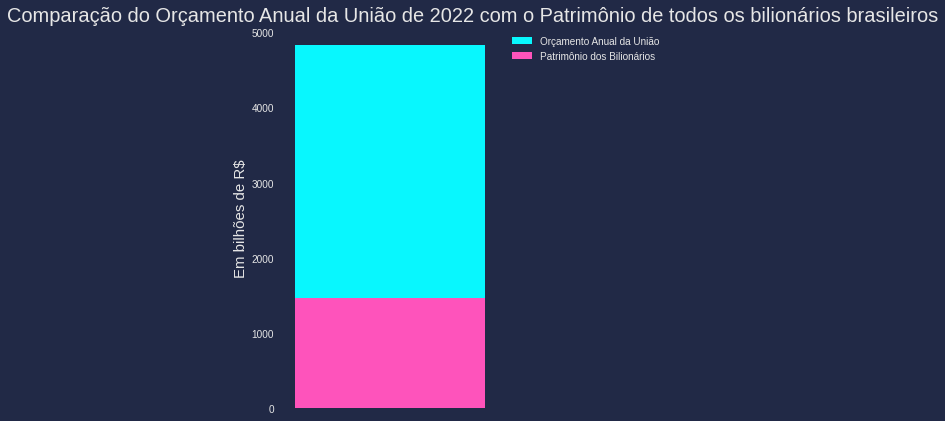

In [34]:
plt.rc('figure', figsize=(7, 7))
plt.bar(0, oau_2022, label='Orçamento Anual da União')
plt.bar(0, billionaries_patrimony, label='Patrimônio dos Bilionários')
plt.bar(0.7, 0)
plt.legend()
plt.title('Comparação do Orçamento Anual da União de 2022 com o Patrimônio de todos os bilionários brasileiros', fontsize=20)
plt.ylabel('Em bilhões de R$', fontsize=15)
plt.grid(False)
ax=plt.gca()
ax.get_xaxis().set_visible(False)

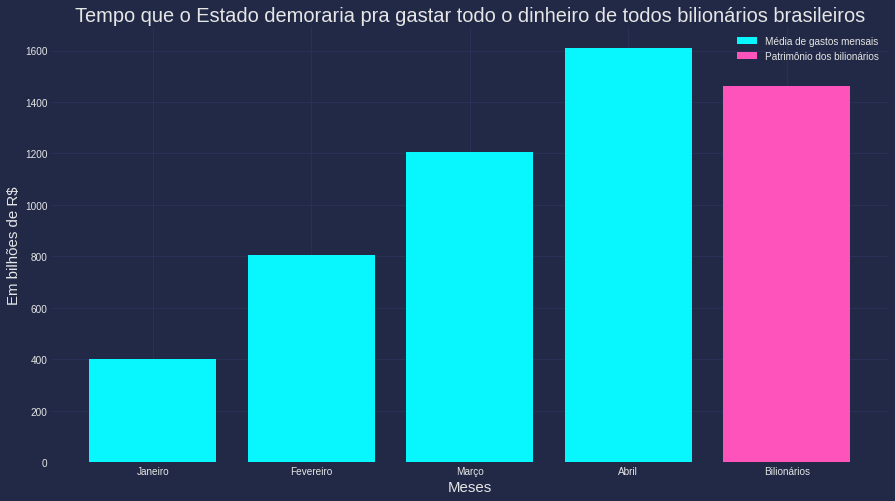

In [30]:
plt.rc('figure', figsize=(15, 8))
plt.bar(df_oau_billionaires.index, df_oau_billionaires['Gastos Mensais'], label='Média de gastos mensais')
plt.bar('Bilionários', billionaries_patrimony, label='Patrimônio dos bilionários')
plt.title('Tempo que o Estado demoraria pra gastar todo o dinheiro de todos bilionários brasileiros', fontsize='20')
plt.xlabel('Meses', fontsize='15')
plt.ylabel('Em bilhões de R$', fontsize='15')
plt.legend()